In [1]:
%cd ..

/Users/crupley/gal/hoodie


In [21]:
import numpy as np
import pandas as pd
import cPickle as pickle
import os

from code.clusterize import *
from code.shapefiles import merge_shapefiles

In [3]:
df = pickle.load(open('featuresdf.pkl', 'rb'))

In [4]:
files = os.listdir('results')
files = [f for f in files if f[:2] == 'CL']
len(files)

63

In [5]:
files.remove('CL000406.csv')

In [6]:
print len(files)
files[:5]

62


['CL00010203040607.csv',
 'CL000102050608.csv',
 'CL00010304050608.csv',
 'CL0001030408.csv',
 'CL0001030708.csv']

In [7]:
fnums = [fn[2:-4] for fn in files]
fnums.remove('xx')
fnums[:5]

['00010203040607',
 '000102050608',
 '00010304050608',
 '0001030408',
 '0001030708']

In [8]:
fnums = [mapno2list(fn) for fn in fnums]
fnums[:5]

[[0, 1, 2, 3, 4, 6, 7],
 [0, 1, 2, 5, 6, 8],
 [0, 1, 3, 4, 5, 6, 8],
 [0, 1, 3, 4, 8],
 [0, 1, 3, 7, 8]]

In [9]:
fname = [list2fname(fn) for fn in fnums]
fname[:5]

NameError: name 'list2fname' is not defined

In [11]:
%%time
nclusters = 25
cnum = cut2cluster('xx', nclusters)

CPU times: user 44.1 s, sys: 745 ms, total: 44.8 s
Wall time: 46.3 s


In [13]:
df = df.ix[cnum.index]
fn = 'data/uscensus/tl_2010_06075_tabblock10/tl_2010_06075_tabblock10.dbf'
mergedf = merge_shapefiles(df[['lat', 'lon']], fn)
polys = make_shapefiles(df[['lat', 'lon']], mergedf.polys, cnum)

In [14]:
print len(cnum.unique())
print len(polys)
print mergedf.shape

25
25
(7325, 3)


In [15]:
fbars = feature_bars(df[['grocery', 'ncrimes', 'sgnf']], cnum)

In [16]:
alldf = pd.DataFrame({'cnum': cnum.unique(),
                      'polygon': polys})
alldf['color'] = clist = gencolors(nclusters)
alldf['mapno'] = ''
alldf['fbars'] = 0
print alldf.shape
alldf.head()

(25, 5)


,cnum,polygon,color,mapno,fbars
0,0,"POLYGON ((-122.451088 37.749696, -122.451063 3...",#e41a1c,,0
1,1,"(POLYGON ((-122.436138 37.749562, -122.43832 3...",#ae394d,,0
2,2,"(POLYGON ((-122.426737 37.711225, -122.426957 ...",#725c83,,0
3,3,POLYGON ((-122.4103819268249 37.77876979913257...,#377eb8,,0
4,4,"(POLYGON ((-122.376974 37.733616, -122.377041 ...",#3e8e95,,0


In [17]:
len(merge_map_data('results'))

TypeError: merge_map_data() takes exactly 2 arguments (1 given)

In [22]:
%%time
alldf = merge_map_data('results', df)
print alldf.shape
alldf.head()

00010203040607
000102050608


(75, 5)
CPU times: user 3min 40s, sys: 3.21 s, total: 3min 43s
Wall time: 3min 50s


In [24]:
alldf

,cnum,polygon,color,mapno,fbars
0,0,"POLYGON ((-122.451088 37.749696, -122.451063 3...",#e41a1c,,"[0.12, -0.08, -0.15, -0.07, -0.13, 0.17, 0.09,..."
1,1,"(POLYGON ((-122.436138 37.749562, -122.43832 3...",#ae394d,,"[0.13, 0.27, 0.32, 0.27, 0.16, 0.11, 0.04, 0.3..."
2,2,"(POLYGON ((-122.426737 37.711225, -122.426957 ...",#725c83,,"[0.09, -0.02, -0.05, -0.02, -0.1, 0.27, 0.27, ..."
3,3,POLYGON ((-122.4103819268249 37.77876979913257...,#377eb8,,"[0.09, 0.05, 0.04, 0.17, 0.06, -0.16, -0.21, -..."
4,4,"(POLYGON ((-122.376974 37.733616, -122.377041 ...",#3e8e95,,"[0.04, 0.02, -0.07, -0.01, -0.02, -0.09, 0.05,..."
5,5,"POLYGON ((-122.405744 37.742521, -122.405405 3...",#469e6f,,"[0.01, 0.06, -0.08, -0.06, -0.1, 0.12, 0.29, -..."
6,6,"POLYGON ((-122.443215 37.764558, -122.4432 37....",#4eae4b,,"[0.13, 0.15, 0.12, 0.16, 0.01, 0.36, 0.06, 0.4..."
7,7,"POLYGON ((-122.428255 37.806997, -122.427777 3...",#659067,,"[0.2, 0.75, 0.83, 0.81, 0.38, 0.12, -0.11, 0.4..."
8,8,"POLYGON ((-122.486631 37.712706, -122.488115 3...",#7f6e85,,"[0.08, -0.07, -0.1, -0.09, -0.15, 0.25, 0.26, ..."
9,9,"POLYGON ((-122.475859 37.794251, -122.475813 3...",#994fa1,,"[0.14, -0.16, -0.17, -0.17, -0.15, -0.46, -0.3..."


In [34]:
gjson = make_json(alldf.cnum, alldf.polygon, alldf.color, alldf.mapno, alldf.fbars)

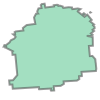

In [33]:
# file size reduced to ~1/3
with open('results/geo.json', 'wb') as f:
    f.write(json.dumps(gjson))